# **Import packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

# **Importing Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project1/Date-Wise-Prices-all-Commodity.csv')
df.head(10)

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0
5,Table6,5,Andhra Pradesh,Kurnool,Alur,Jowar(Sorghum),Jowar ( White),FAQ,24/02/2023,2780,2940.0,2860.0
6,Table7,6,Andhra Pradesh,Kurnool,Atmakur,Maize,Hybrid/Local,FAQ,24/02/2023,1962,1962.0,1962.0
7,Table8,7,Andhra Pradesh,Kurnool,Atmakur,Paddy(Dhan)(Common),Sona Mahsuri,FAQ,24/02/2023,2040,2040.0,2040.0
8,Table9,8,Andhra Pradesh,Kurnool,Banaganapalli,Bengal Gram(Gram)(Whole),Desi (Whole),FAQ,24/02/2023,4600,4800.0,4700.0
9,Table10,9,Andhra Pradesh,Kurnool,Banaganapalli,Jowar(Sorghum),Jowar ( White),FAQ,24/02/2023,2800,3100.0,3000.0


# **Understanding the Dataset**

In [ ]:
#Checking columns
print('list of columns:',sep='/n')
df.columns

list of columns:


Index(['diffgr:id', 'msdata:rowOrder', 'State', 'District', 'Market',
       'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_x0020_Price',
       'Max_x0020_Price', 'Modal_x0020_Price'],
      dtype='object')

In [ ]:
#checking rows and columns count
df.shape

(6435, 12)

In [ ]:
#Checking the data types of the given columns
df.dtypes

diffgr:id             object
msdata:rowOrder        int64
State                 object
District              object
Market                object
Commodity             object
Variety               object
Grade                 object
Arrival_Date          object
Min_x0020_Price        int64
Max_x0020_Price      float64
Modal_x0020_Price    float64
dtype: object

In [ ]:
#Checking information the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diffgr:id          6435 non-null   object 
 1   msdata:rowOrder    6435 non-null   int64  
 2   State              6435 non-null   object 
 3   District           6435 non-null   object 
 4   Market             6435 non-null   object 
 5   Commodity          6435 non-null   object 
 6   Variety            6435 non-null   object 
 7   Grade              6435 non-null   object 
 8   Arrival_Date       6435 non-null   object 
 9   Min_x0020_Price    6435 non-null   int64  
 10  Max_x0020_Price    6435 non-null   float64
 11  Modal_x0020_Price  6435 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 603.4+ KB


In [ ]:
#checking for null values count
df.isnull().sum()

diffgr:id            0
msdata:rowOrder      0
State                0
District             0
Market               0
Commodity            0
Variety              0
Grade                0
Arrival_Date         0
Min_x0020_Price      0
Max_x0020_Price      0
Modal_x0020_Price    0
dtype: int64

From the above output we can see that the dataset doesn't contains any null values

In [ ]:
#checking description of the data
df.describe()

,msdata:rowOrder,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
count,6435.000000,6435.000000,6435.000000,6435.000000
mean,3217.000000,4107.969231,4676.000738,4415.979705
std,1857.768823,20324.137126,23998.000980,22159.552059
min,0.000000,0.000000,0.000000,3.000000
25%,1608.500000,1200.000000,1420.000000,1300.000000
50%,3217.000000,2300.000000,2600.000000,2500.000000
75%,4825.500000,4400.000000,5000.000000,4607.500000
max,6434.000000,800000.000000,1000000.000000,900000.000000


In [ ]:
#Dropping unwanted columns
df.drop(['diffgr:id','msdata:rowOrder'],axis=1,inplace=True)
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0


# Exploratory Data Analysis

In [ ]:
print('the mean value of the minimum price:')
df['Min_x0020_Price'].mean()

the mean value of the minimum price:


4107.969230769231

In [ ]:
df['Modal_x0020_Price'].mean()

4415.979704739704

In [ ]:
print('market and varieties :')
dp=df.loc[df.Modal_x0020_Price>=4415.979704739704,['Market','Variety']].tail(10)
dp

market and varieties :


,Market,Variety
6404,Kandi,Mustard
6411,Nadia,TD-5
6412,Nadia,Yellow (Black)
6417,Baruipur(Canning),Bitter Gourd
6421,Baruipur(Canning),Green Chilly
6422,Baruipur(Canning),Other
6425,Baruipur(Canning),Super Fine
6428,Diamond Harbour(South 24-pgs),Katla(Big)
6429,Diamond Harbour(South 24-pgs),Green Chilly
6433,Diamond Harbour(South 24-pgs),Super Fine


([0, 1, 2, 3],
 [Text(0, 0, 'Kandi'),
  Text(1, 0, 'Nadia'),
  Text(2, 0, 'Baruipur(Canning)'),
  Text(3, 0, 'Diamond Harbour(South 24-pgs)')])

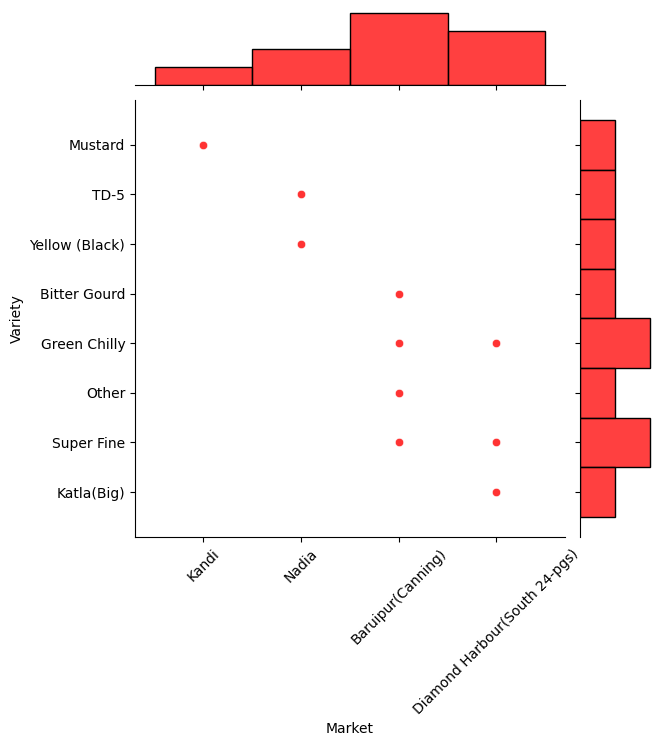

In [ ]:
sns.jointplot(x='Market',y='Variety',data=dp,color='red',alpha=0.8)
plt.xticks(rotation=45)

In Baruipur(Canning) market wide range of varities are available

In [ ]:
#states and commodities greater than mean value
df1=df.loc[df.Min_x0020_Price>=4107.969230769231,['State','Commodity']].sample(20)
df1

,State,Commodity
4796,Uttar Pradesh,Arhar (Tur/Red Gram)(Whole)
6281,West Bengal,Green Gram Dal (Moong Dal)
4795,Uttar Pradesh,Apple
5579,Uttar Pradesh,Arhar (Tur/Red Gram)(Whole)
3394,Rajasthan,Taramira
1760,Kerala,Colacasia
2637,Manipur,Dry Chillies
3801,Tripura,Green Chilli
1797,Kerala,Rubber
1349,Kerala,Amaranthus


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'West Bengal'),
  Text(2, 0, 'Rajasthan'),
  Text(3, 0, 'Kerala'),
  Text(4, 0, 'Manipur'),
  Text(5, 0, 'Tripura'),
  Text(6, 0, 'NCT of Delhi'),
  Text(7, 0, 'Madhya Pradesh'),
  Text(8, 0, 'Nagaland'),
  Text(9, 0, 'Gujarat')])

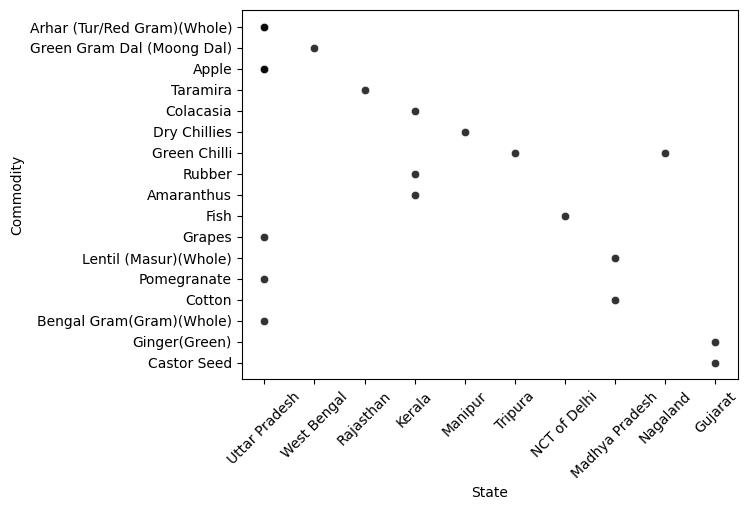

In [ ]:
sns.scatterplot(x='State',y='Commodity',data=df1,color='black',alpha=0.8)
plt.xticks(rotation=45)

from sample data of states and its commodities uttarpradesh is having many types of commodities

<Axes: >

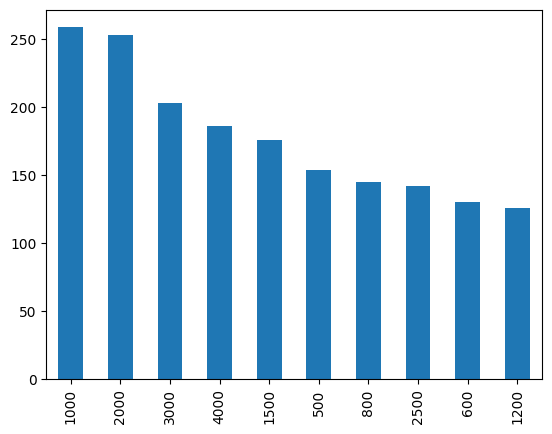

In [ ]:
df['Min_x0020_Price'].value_counts().head(10).plot.bar()

Variation of (Min_x0020_Price) for the first 25 rows and it is observed that base price is 1000 then followed by 2000

In [ ]:
#checking maximum price value counts.
df['Max_x0020_Price'].value_counts().head(10)

2000.0    206
4000.0    205
3000.0    199
1000.0    183
1500.0    172
2500.0    158
5000.0    150
1200.0    142
3500.0    136
800.0     108
Name: Max_x0020_Price, dtype: int64

<Axes: ylabel='District'>

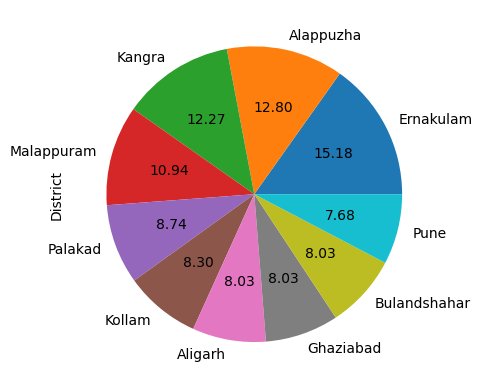

In [ ]:
df['District'].value_counts().head(10).plot.pie(autopct="%.2f")

These are the districts repeating more

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000.]),
 [Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000')])

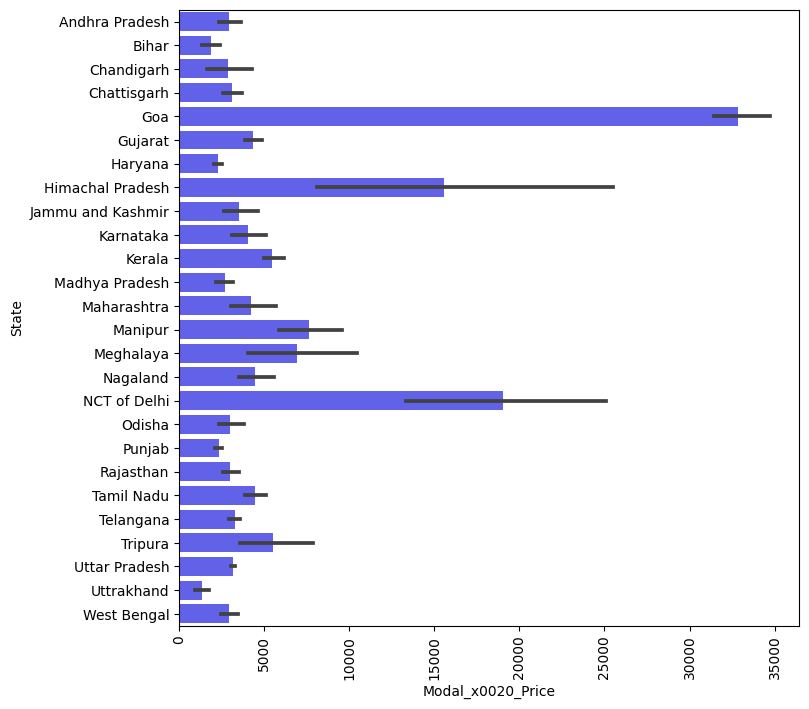

In [ ]:
plt.figure(figsize= (8,8))
sns.barplot(y='State',x='Modal_x0020_Price',color='blue',alpha=0.7,data=df,orient='h')
plt.xticks(rotation=90)

Goa stands highest with an avg price above 30000

In [ ]:
#types of grades
df2=df['Grade'].value_counts()
df2

FAQ       5641
Medium     694
Large       91
Small        9
Name: Grade, dtype: int64

Text(0.5, 1.0, 'final price ratio based on grades')

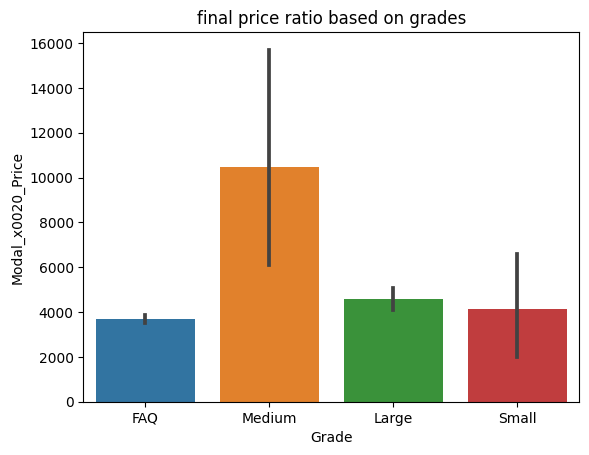

In [ ]:
sns.barplot(y='Modal_x0020_Price',x='Grade',data=df,)
plt.title('final price ratio based on grades')

In [ ]:
#highest avg prices in the data set.
df3=df[df['Modal_x0020_Price'].isin(df['Modal_x0020_Price'].nlargest(10))].sort_values(by='Modal_x0020_Price',ascending=False)
df3

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
1011,Himachal Pradesh,Sirmore,Nahan,Grapes,Black,Medium,24/02/2023,800000,1000000.0,900000.0
1017,Himachal Pradesh,Sirmore,Paonta Sahib,Apple,Kasmir/Shimla - II,Medium,24/02/2023,800000,900000.0,850000.0
1024,Himachal Pradesh,Sirmore,Paonta Sahib,Grapes,Other,Medium,24/02/2023,650000,750000.0,700000.0
1004,Himachal Pradesh,Sirmore,Nahan,Apple,Other,Medium,24/02/2023,600000,700000.0,650000.0
1018,Himachal Pradesh,Sirmore,Paonta Sahib,Banana,Other,Medium,24/02/2023,450000,550000.0,500000.0
1025,Himachal Pradesh,Sirmore,Paonta Sahib,Guava,Other,Medium,24/02/2023,450000,550000.0,500000.0
1589,Kerala,Idukki,Thodupuzha,Cardamoms,Other,FAQ,24/02/2023,240000,250000.0,250000.0
1021,Himachal Pradesh,Sirmore,Paonta Sahib,Carrot,Other,FAQ,24/02/2023,180000,200000.0,190000.0
2414,Maharashtra,Mumbai,Mumbai,Cardamoms,Other,FAQ,24/02/2023,120000,180000.0,150000.0
1591,Kerala,Idukki,Thodupuzha,Cloves,Other,FAQ,24/02/2023,75000,77500.0,77500.0


<function matplotlib.pyplot.show(close=None, block=None)>

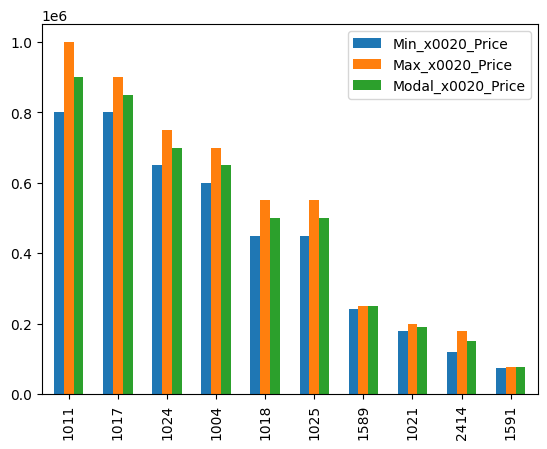

In [ ]:
df3.plot(kind='bar',width=(0.6))
plt.show

In [ ]:
df.groupby('Grade')[['Max_x0020_Price','Variety']].agg({'Max_x0020_Price':'mean'})
#df.groupby('Grade')['Max_x0020_Price'].mean().sort_values(ascending=False).head()

,Max_x0020_Price
Grade,
FAQ,3861.576626
Large,4985.714286
Medium,11258.229107
Small,4444.444444


In [ ]:
df['Commodity'].unique()

array(['Gur(Jaggery)', 'Tomato', 'Jowar(Sorghum)', 'Maize',
       'Paddy(Dhan)(Common)', 'Bengal Gram(Gram)(Whole)', 'Lemon',
       'Brinjal', 'Cauliflower', 'Onion', 'Potato', 'Apple', 'Banana',
       'Cabbage', 'Coriander(Leaves)', 'Grapes', 'Bottle gourd',
       'Field Pea', 'Raddish', 'Bhindi(Ladies Finger)', 'Green Chilli',
       'Peas cod', 'Cucumbar(Kheera)', 'Ginger(Green)',
       'Mousambi(Sweet Lime)', 'Peas Wet', 'Pomegranate', 'Pumpkin',
       'Wheat', 'Lak(Teora)', 'Orange', 'Papaya', 'Mahua',
       'Tamarind Seed', 'Banana - Green', 'Bitter gourd', 'Capsicum',
       'Carrot', 'Chikoos(Sapota)', 'Garlic', 'Guar', 'Guava',
       'Knool Khol', 'Little gourd (Kundru)', 'Methi(Leaves)',
       'Papaya (Raw)', 'Sweet Potato', 'Water Melon',
       'Arhar (Tur/Red Gram)(Whole)', 'Soyabean', 'Kodo Millet(Varagu)',
       'Mahua Seed(Hippe seed)', 'Arecanut(Betelnut/Supari)',
       'Cummin Seed(Jeera)', 'Groundnut', 'Corriander seed', 'Cotton',
       'Sesamum(Sesame,Gi

In [ ]:
am=df[df["State"]=="Andhra Pradesh"][["State","Commodity","Variety"]]
print('These are the available varaties and commodities in the state AP:')
am

These are the available varaties and commodities in the state AP:


,State,Commodity,Variety
0,Andhra Pradesh,Gur(Jaggery),NO 1
1,Andhra Pradesh,Gur(Jaggery),NO 2
2,Andhra Pradesh,Gur(Jaggery),NO 3
3,Andhra Pradesh,Tomato,Hybrid
4,Andhra Pradesh,Tomato,Local
5,Andhra Pradesh,Jowar(Sorghum),Jowar ( White)
6,Andhra Pradesh,Maize,Hybrid/Local
7,Andhra Pradesh,Paddy(Dhan)(Common),Sona Mahsuri
8,Andhra Pradesh,Bengal Gram(Gram)(Whole),Desi (Whole)
9,Andhra Pradesh,Jowar(Sorghum),Jowar ( White)


In [ ]:
df4=df[df['Commodity']=='Tomato'][['State','Variety','Commodity']]
print('from which state which variety the commodity(tomato) falls under:')
df4

from which state which variety the commodity(tomato) falls under:


,State,Variety,Commodity
3,Andhra Pradesh,Hybrid,Tomato
4,Andhra Pradesh,Local,Tomato
27,Bihar,Deshi,Tomato
36,Bihar,Deshi,Tomato
42,Bihar,Deshi,Tomato
...,...,...,...
6352,West Bengal,Hybrid,Tomato
6356,West Bengal,Other,Tomato
6372,West Bengal,Other,Tomato
6380,West Bengal,Other,Tomato


Text(0.5, 1.0, 'Most preferred grade used over the years')

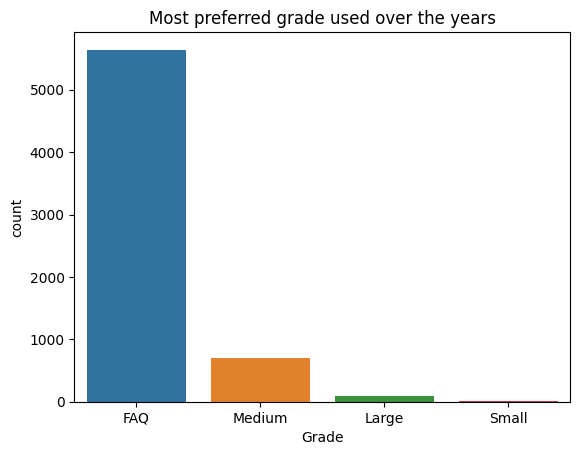

In [ ]:
sns.countplot(x='Grade', data=df, orient='h')
plt.title("Most preferred grade used over the years")

people are preferring FAQ grade